### this notebook performs a kernel ridge regression with 10-fold nested cross validation

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import KFold
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df_features = pd.read_csv('BASC_Features_GMDerivatives.csv')
#df_age = pd.read_csv('/home/angela/Desktop/pac2019/PAC2019_BrainAge_Training.csv')
df_age = pd.read_csv('PAC2019_BrainAge_Training.csv')
df_indices = pd.read_csv('group_indices.tsv', sep='\t',index_col=0)

In [4]:
train_ids = df_indices[df_indices.Group=='train'].index
test_ids =  df_indices[df_indices.Group=='test'].index
test_feats = pd.DataFrame(df_features[df_features.subject_ID.isin(test_ids)],
                                         copy=True)
df_features = df_features[df_features.subject_ID.isin(train_ids)]

test_age = pd.DataFrame(df_age[df_age.subject_ID.isin(test_ids)],
                       copy=True)
df_age = df_age[df_age.subject_ID.isin(train_ids)]

In [8]:
random_state = 1

In [54]:
# set the x
x_ = df_features.loc[:,'scale007_1'::].values

# set the y
y_ = df_age.loc[:,'age'].values

In [41]:
# Set up possible values of parameters to optimize over
p_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
         'kernel': ['rbf']} # I also tried linear and polynomial, but rbf was the best
# We will use kernel ridge regression
krr = KernelRidge()
# set up cross validators
inner_cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
# set the parameter search classifier
clf = GridSearchCV(estimator=krr, param_grid=p_grid, scoring='neg_mean_absolute_error',
                   cv=inner_cv, refit=True)

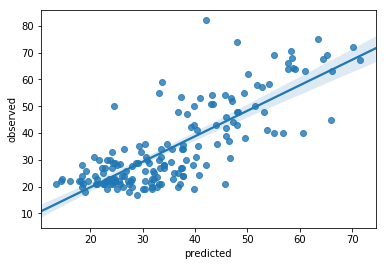

ACCURACY: rho = 0.7274124478266262, mae = 7.2564229950336685


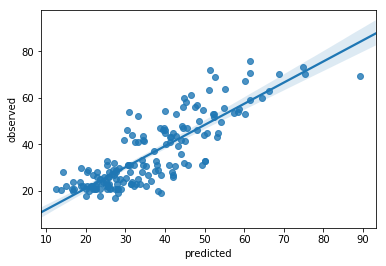

ACCURACY: rho = 0.8115002395786253, mae = 6.371945932084242


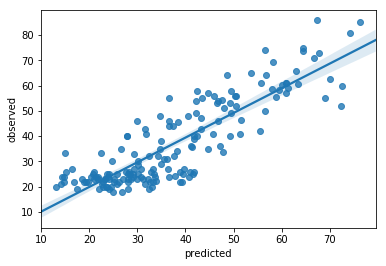

ACCURACY: rho = 0.8217989832559871, mae = 6.8791880882443355


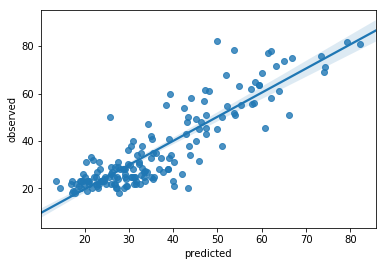

ACCURACY: rho = 0.8085633017215418, mae = 6.100169556325492


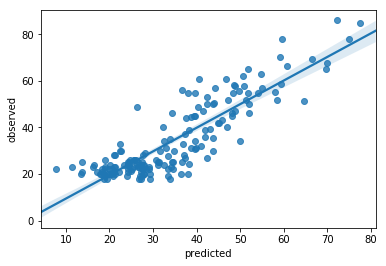

ACCURACY: rho = 0.8068050025928528, mae = 6.21507943455385


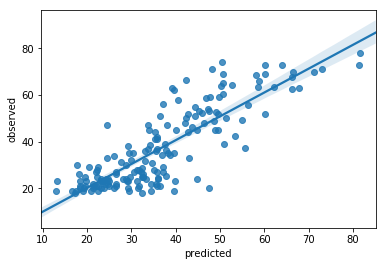

ACCURACY: rho = 0.7978927579495643, mae = 6.999723966209923


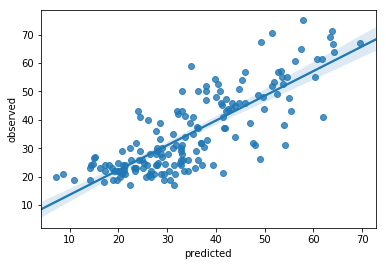

ACCURACY: rho = 0.7867015614419551, mae = 6.490668648197627


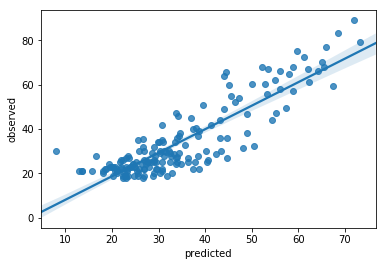

ACCURACY: rho = 0.7921689386790982, mae = 6.263322276389495


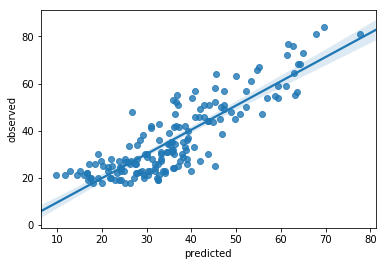

ACCURACY: rho = 0.8235632336196176, mae = 6.497968561706288


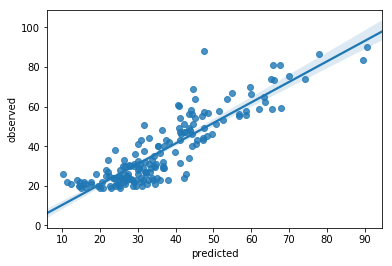

ACCURACY: rho = 0.8506871603533387, mae = 6.364169682113676


In [43]:
param_list = []
r2_list = []
mae_list = []
rho_list = []


for ind_train, ind_test in outer_cv.split(x_,y_):
    x_train, x_test = x_[ind_train], x_[ind_test]
    y_train, y_test = y_[ind_train], y_[ind_test]

#     # normalize to the training set
#     scaler = StandardScaler()
#     x_train = scaler.fit_transform(x_[ind_train])
#     # transform the test set(s) to same parameters as training set
#     x_test = scaler.transform(x_[ind_test])

    # train the model
    clf.fit(X=x_train, y=y_train)
    # save best parameters
    param_list.append(clf.best_params_)

    # test on held-out fold
    y_pred = clf.predict(x_test)
    # evaluate
    r2_list.append(r2_score(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)
    pearson_r2 = stats.pearsonr(y_pred, y_test)[0]**2
    rho = stats.spearmanr(y_pred, y_test)[0]
    rho_list.append(rho)
    
    # plot
    sns.regplot(y_pred, y_test)
    plt.xlabel('predicted')
    plt.ylabel('observed')
    plt.show()
    print('ACCURACY: rho = {}, mae = {}'.format(rho, mae))

In [44]:
# note this r2 is the coefficient of determination
r2_list

[0.62332163623683223,
 0.69371050534752898,
 0.7438317280664285,
 0.76685351404371915,
 0.75845897541242824,
 0.70500837821163864,
 0.63646401747102743,
 0.76542606232632548,
 0.74116950956711336,
 0.77365343997326907]

In [45]:
np.mean(r2_list)

0.72078977666563104

In [46]:
mae_list

[7.2564229950336685,
 6.371945932084242,
 6.8791880882443355,
 6.1001695563254916,
 6.21507943455385,
 6.9997239662099231,
 6.4906686481976266,
 6.2633222763894949,
 6.4979685617062879,
 6.3641696821136762]

In [47]:
np.mean(mae_list)

6.5438659140858588

In [20]:
rho_list

[0.74378040343989316,
 0.81962214603028627,
 0.83128280085357997,
 0.82845142243380865,
 0.82064080153281871,
 0.80590347467975454,
 0.81072933477365028,
 0.79189519043401924,
 0.83406503664939768,
 0.8625425098367564]

In [21]:
np.mean(rho_list)

0.81489131206639664

In [48]:
param_list

[{'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'}]

# Test

In [62]:
krr = KernelRidge(alpha=0.001, kernel='rbf')
krr.fit(x_,y_)

KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=None, kernel='rbf',
      kernel_params=None)

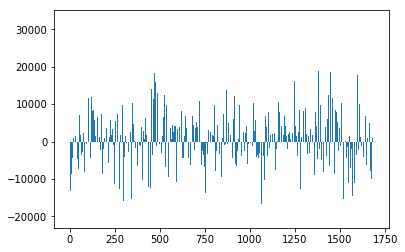

In [35]:
plt.close()
plt.bar(range(len(krr.dual_coef_)),krr.dual_coef_)
plt.show()

#### Apply to camcan

In [15]:
cc = pd.read_csv('/home/users/jvogel/git/PAC2019/PAC2019-MtRoyal_XValidators/BASC_Features_GMDerivatives_CamCan.csv')
cc_subids = cc[cc.columns[0]].values
cc.drop(cc.columns[0],1,inplace=True)

In [16]:
cc = cc.reindex(columns=df_features.loc[:,'scale007_1'::].columns)
cc.head()

,scale007_1,scale007_2,scale007_3,scale007_4,scale007_5,scale007_6,scale007_7,scale012_1,scale012_2,scale012_3,...,scale444_435,scale444_436,scale444_437,scale444_438,scale444_439,scale444_440,scale444_441,scale444_442,scale444_443,scale444_444
0,0.513343,0.460125,0.317172,0.393401,0.417126,0.378441,0.382481,0.354574,0.381429,0.460125,...,0.295956,0.355525,0.488274,0.487140,0.477772,0.389958,0.469066,0.316256,0.262017,0.274430
1,0.538947,0.503257,0.344884,0.377230,0.449494,0.404144,0.410375,0.363600,0.454746,0.503257,...,0.347871,0.354916,0.451874,0.534077,0.434372,0.317027,0.424481,0.344630,0.292787,0.297050
2,0.579018,0.501662,0.359759,0.416737,0.455873,0.432608,0.419214,0.394878,0.431929,0.501662,...,0.444118,0.369105,0.456618,0.536437,0.475431,0.419721,0.519233,0.319302,0.280916,0.302178
3,0.445732,0.453452,0.301174,0.367244,0.408324,0.386826,0.382840,0.349537,0.426575,0.453452,...,0.409427,0.372606,0.453168,0.494050,0.469024,0.326275,0.505652,0.306829,0.238181,0.272094
4,0.609412,0.583485,0.411800,0.481412,0.550949,0.511151,0.510627,0.472489,0.531726,0.583485,...,0.573036,0.447221,0.587064,0.531177,0.616009,0.532636,0.593133,0.473586,0.389922,0.341668


In [17]:
ccdf = pd.read_csv('participant_data.csv',index_col=0)

In [18]:
cc_ages = ccdf.loc[cc_subids].age.values

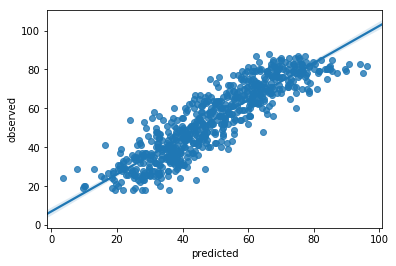

ACCURACY: rho = 0.9034873424381893, mae = 7.777856615620765


In [75]:
cc_pred = krr.predict(cc)
mae = mean_absolute_error(cc_ages, cc_pred)
mae_list.append(mae)
pearson_r2 = stats.pearsonr(cc_pred, cc_ages)[0]**2
rho = stats.spearmanr(cc_pred, cc_ages)[0]
rho_list.append(rho)

# plot
sns.regplot(cc_pred, cc_ages)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.show()
print('ACCURACY: rho = {}, mae = {}'.format(rho, mae))

In [77]:
pearson_r2

0.79432194954165436

# PAC test

In [56]:
# set the x
xtest = test_feats.loc[:,'scale007_1'::].values
# set the y
ytest = test_age.loc[:,'age'].values

In [57]:
len(ytest)

423

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


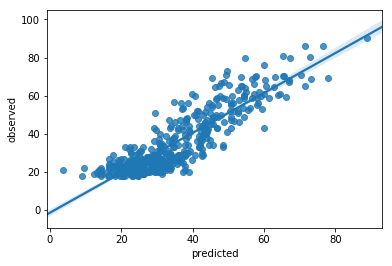

ACCURACY: rho = 0.8442698276756847, mae = 6.2090507390985, r2 = 0.7675346695583746


In [58]:
# test
y_pred = clf.predict(xtest)

# evaluate
r2 = r2_score(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
pearson_r2 = stats.pearsonr(y_pred, ytest)[0]**2
rho = stats.spearmanr(y_pred, ytest)[0]

# plot
sns.regplot(y_pred, ytest)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.show()
print('ACCURACY: rho = {}, mae = {}, r2 = {}'.format(rho, mae, r2))

# Train on camcan test on PAC

In [78]:
# set the x
x_ = cc.values

# set the y
y_ = cc_ages

In [79]:
# Set up possible values of parameters to optimize over
p_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
         'kernel': ['rbf']} # I also tried linear and polynomial, but rbf was the best
# We will use kernel ridge regression
krr = KernelRidge()
# set up cross validators
inner_cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
# set the parameter search classifier
clf = GridSearchCV(estimator=krr, param_grid=p_grid, scoring='neg_mean_absolute_error',
                   cv=inner_cv, refit=True)

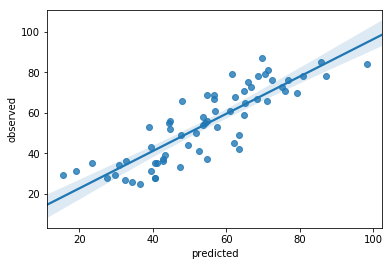

ACCURACY: rho = 0.8858698443091626, mae = 7.751283065350323


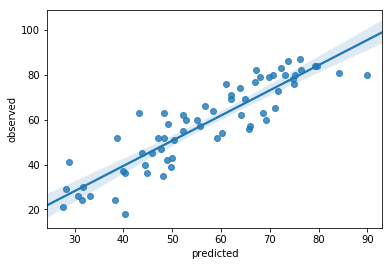

ACCURACY: rho = 0.9050841980755325, mae = 7.374352615927326


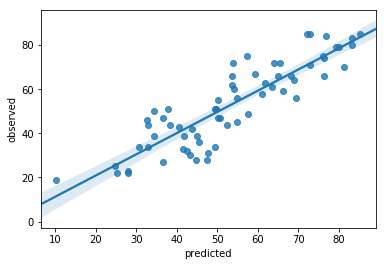

ACCURACY: rho = 0.879084457124188, mae = 7.094301585463109


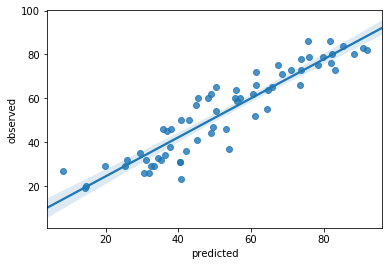

ACCURACY: rho = 0.9384436468648409, mae = 6.4360329214905505


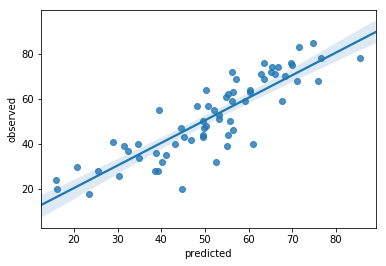

ACCURACY: rho = 0.8813859912029631, mae = 7.181915294606272


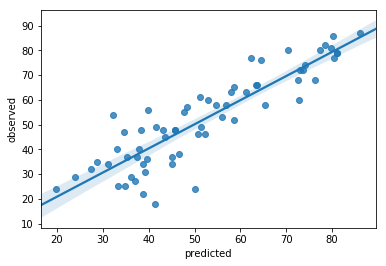

ACCURACY: rho = 0.8776180120715015, mae = 6.615339787792562


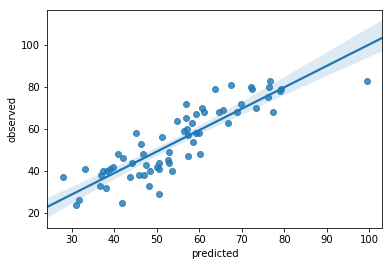

ACCURACY: rho = 0.881947927539513, mae = 6.610507032186643


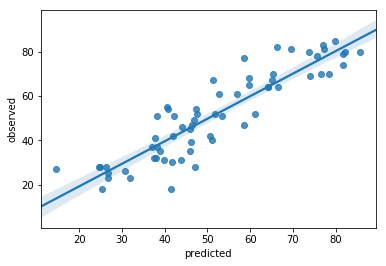

ACCURACY: rho = 0.8996771466095016, mae = 6.692074697427074


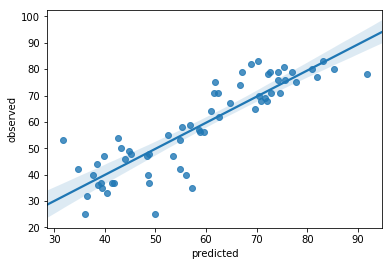

ACCURACY: rho = 0.8745620492604843, mae = 6.120689949663301


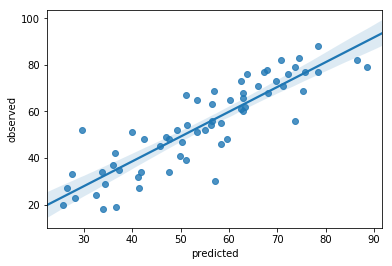

ACCURACY: rho = 0.8917693858243525, mae = 6.98176119242563


In [80]:
param_list = []
r2_list = []
mae_list = []
rho_list = []


for ind_train, ind_test in outer_cv.split(x_,y_):
    x_train, x_test = x_[ind_train], x_[ind_test]
    y_train, y_test = y_[ind_train], y_[ind_test]

#     # normalize to the training set
#     scaler = StandardScaler()
#     x_train = scaler.fit_transform(x_[ind_train])
#     # transform the test set(s) to same parameters as training set
#     x_test = scaler.transform(x_[ind_test])

    # train the model
    clf.fit(X=x_train, y=y_train)
    # save best parameters
    param_list.append(clf.best_params_)

    # test on held-out fold
    y_pred = clf.predict(x_test)
    # evaluate
    r2_list.append(r2_score(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)
    pearson_r2 = stats.pearsonr(y_pred, y_test)[0]**2
    rho = stats.spearmanr(y_pred, y_test)[0]
    rho_list.append(rho)
    
    # plot
    sns.regplot(y_pred, y_test)
    plt.xlabel('predicted')
    plt.ylabel('observed')
    plt.show()
    print('ACCURACY: rho = {}, mae = {}'.format(rho, mae))

In [93]:
param_list

[{'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.01, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.01, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.01, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.01, 'kernel': 'rbf'},
 {'alpha': 0.01, 'kernel': 'rbf'}]

In [95]:
for alpha in [0.001,0.01]:
    krr = KernelRidge(alpha=alpha, kernel='rbf').fit(x_,y_)
    pred = krr.predict(x_)
    mae = mean_absolute_error(y_,pred)
    print(alpha,mae)

0.001 4.28158001108
0.01 5.83249716716


In [96]:
# set the x
pacX = df_features.loc[:,'scale007_1'::].values

# set the y
pacY = df_age.loc[:,'age'].values

In [ ]:
krr = KernelRidge(alpha=0.001, kernel='rbf').fit(x_,y_)


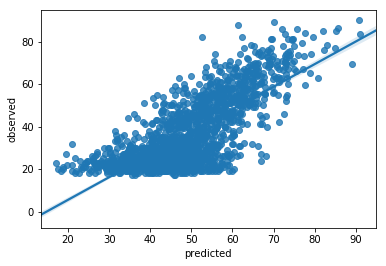

ACCURACY: rho = 0.6915876038862571, mae = 13.958779987920918, r2 = 0.5667259660854338


In [98]:
pac_pred = krr.predict(pacX) 
mae = mean_absolute_error(pacY, pac_pred) 
mae_list.append(mae) 
pearson_r2 = stats.pearsonr(pac_pred, pacY)[0]**2
rho = stats.spearmanr(pac_pred, pacY)[0]
rho_list.append(rho)

# plot
sns.regplot(pac_pred, pacY)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.show()
print('ACCURACY: rho = {}, mae = {}, r2 = {}'.format(rho, mae,pearson_r2))

# Combine PAC & CAMAN

In [102]:
allX = np.concatenate([x_,pacX])
allY = np.concatenate([y_,pacY])

In [103]:
krr = KernelRidge(alpha=0.001, kernel='rbf').fit(allX,allY)

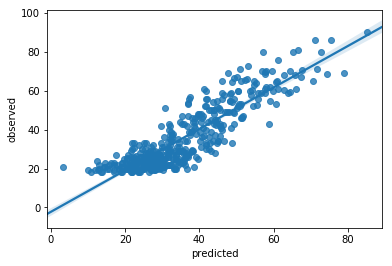

ACCURACY: rho = 0.85180988730826, mae = 6.19274176714608, r2 = 0.7783758597663542


In [104]:
# set the x
xtest = test_feats.loc[:,'scale007_1'::].values
# set the y
ytest = test_age.loc[:,'age'].values


# test
y_pred = krr.predict(xtest)

# evaluate
r2 = r2_score(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
pearson_r2 = stats.pearsonr(y_pred, ytest)[0]**2
rho = stats.spearmanr(y_pred, ytest)[0]

# plot
sns.regplot(y_pred, ytest)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.show()
print('ACCURACY: rho = {}, mae = {}, r2 = {}'.format(rho, mae, r2))

### Filter subjects

0.8442698276756847, mae = 6.2090507390985, r2 = 0.7675346695583746

# ADD WM FEATURES

In [67]:
wmfeatures = pd.DataFrame(np.load('WM_features.npz')['arr_0'])
wm_ids = pd.read_csv('WM_subjIDs.tsv',sep='\t',index_col=0)
wmfeatures.index = wm_ids.subject_ID

In [69]:
wm_IDs = wmfeatures.dropna().index

In [111]:
train_overlap = set(wm_IDs) & set(df_features.subject_ID)
test_overlap = set(wm_IDs) & set(test_feats.subject_ID)

test_feats = test_feats[test_feats.subject_ID.isin(test_overlap)]
df_features = df_features[df_features.subject_ID.isin(train_overlap)]

test_age = df_age[df_age.subject_ID.isin(test_overlap)]
df_age = df_age[df_age.subject_ID.isin(train_overlap)]

In [113]:
new_test = pd.concat([test_feats.reset_index(),
                      wmfeatures.loc[test_overlap].reset_index()],
                     axis=1)
new_features = pd.concat([df_features.reset_index(),
                       wmfeatures.loc[train_overlap].reset_index()],
                      axis=1)

In [94]:
# set the x
x_ = new_features.loc[:,'scale007_1'::].drop('subject_ID',
                                             axis=1).values
# set the y
y_ = df_age.loc[:,'age'].values

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


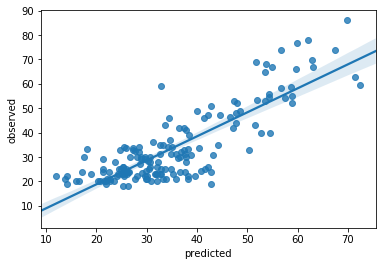

ACCURACY: rho = 0.7202077584464209, mae = 6.6524397740702765


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


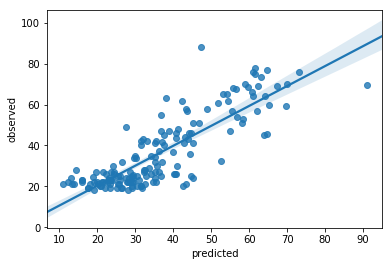

ACCURACY: rho = 0.7977086091901638, mae = 7.4764822097432875


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


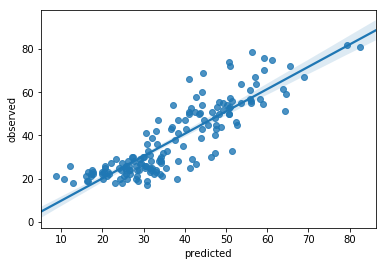

ACCURACY: rho = 0.862166956450291, mae = 6.376705181624228


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


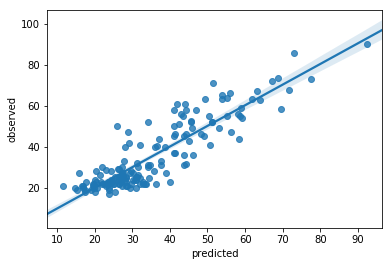

ACCURACY: rho = 0.8326153661149329, mae = 5.799108702233211


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


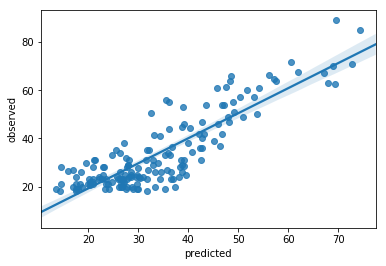

ACCURACY: rho = 0.7613302587748672, mae = 6.337467117595798


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


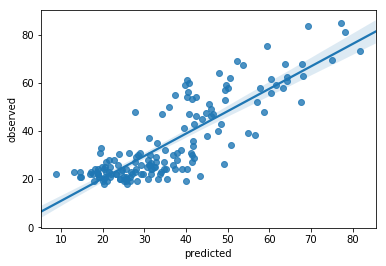

ACCURACY: rho = 0.7826974222390665, mae = 7.219200245923443


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


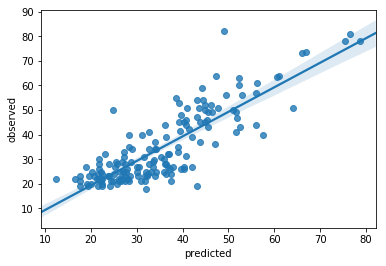

ACCURACY: rho = 0.7863801045798107, mae = 6.206015449733489


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


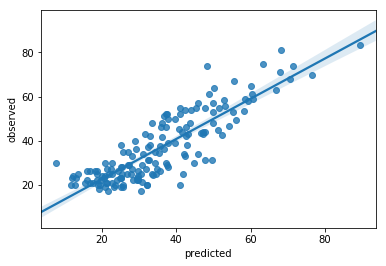

ACCURACY: rho = 0.8226578338393984, mae = 6.566191035242315


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


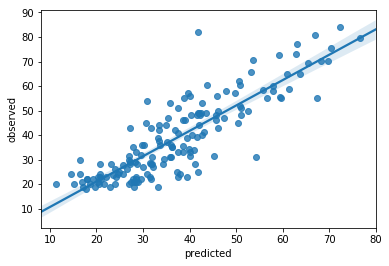

ACCURACY: rho = 0.8528466394346866, mae = 6.353017692598993


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


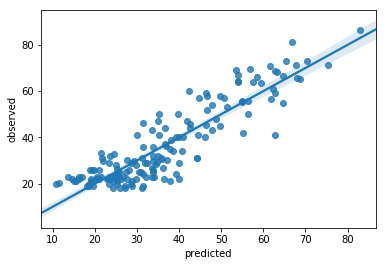

ACCURACY: rho = 0.8377232333265865, mae = 5.985331935572762


In [95]:
param_list = []
r2_list = []
mae_list = []
rho_list = []


for ind_train, ind_test in outer_cv.split(x_,y_):
    x_train, x_test = x_[ind_train], x_[ind_test]
    y_train, y_test = y_[ind_train], y_[ind_test]

#     # normalize to the training set
#     scaler = StandardScaler()
#     x_train = scaler.fit_transform(x_[ind_train])
#     # transform the test set(s) to same parameters as training set
#     x_test = scaler.transform(x_[ind_test])

    # train the model
    clf.fit(X=x_train, y=y_train)
    # save best parameters
    param_list.append(clf.best_params_)

    # test on held-out fold
    y_pred = clf.predict(x_test)
    # evaluate
    r2_list.append(r2_score(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)
    pearson_r2 = stats.pearsonr(y_pred, y_test)[0]**2
    rho = stats.spearmanr(y_pred, y_test)[0]
    rho_list.append(rho)
    
    # plot
    sns.regplot(y_pred, y_test)
    plt.xlabel('predicted')
    plt.ylabel('observed')
    plt.show()
    print('ACCURACY: rho = {}, mae = {}'.format(rho, mae))

In [96]:
print('mean',np.mean(r2_list))
print('mae',np.mean(mae_list))
print('rho',np.mean(rho_list))

mean 0.7347432014717918
mae 6.497195934433781
rho 0.8056334182396224


In [97]:
print(param_list)

[{'alpha': 0.001, 'kernel': 'rbf'}, {'alpha': 0.001, 'kernel': 'rbf'}, {'alpha': 0.001, 'kernel': 'rbf'}, {'alpha': 0.001, 'kernel': 'rbf'}, {'alpha': 0.001, 'kernel': 'rbf'}, {'alpha': 0.001, 'kernel': 'rbf'}, {'alpha': 0.001, 'kernel': 'rbf'}, {'alpha': 0.001, 'kernel': 'rbf'}, {'alpha': 0.001, 'kernel': 'rbf'}, {'alpha': 0.001, 'kernel': 'rbf'}]


# Test with WM

In [98]:
krr = KernelRidge(alpha=0.001, kernel='rbf')
krr.fit(x_,y_)

KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=None, kernel='rbf',
      kernel_params=None)

In [115]:
# set the x
xtest = new_test.loc[:,'scale007_1'::].drop('subject_ID',
                                             axis=1).values
# set the y
ytest = test_age.loc[:,'age'].values

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


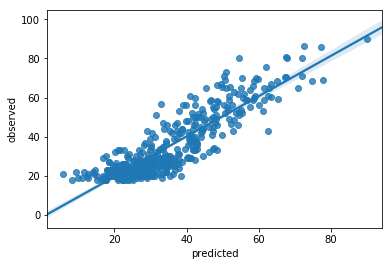

ACCURACY: rho = 0.8441543374766144, mae = 6.225281122100643, r2 = 0.769567329210793


In [116]:
# test
y_pred = clf.predict(xtest)

# evaluate
r2 = r2_score(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
pearson_r2 = stats.pearsonr(y_pred, ytest)[0]**2
rho = stats.spearmanr(y_pred, ytest)[0]

# plot
sns.regplot(y_pred, ytest)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.show()
print('ACCURACY: rho = {}, mae = {}, r2 = {}'.format(rho, mae, r2))

# Add GM covariance features

In [110]:
cov = pd.read_csv('/home/users/jvogel/git/PAC2019/PAC2019-MtRoyal_XValidators/COV_feats.csv',
                 index_col=0)
cov = cov.loc[train_ids,cov.columns[1:]].values
covX = np.concatenate([pacX,cov],axis=1)

In [116]:
x_ = covX
y_ = df_age.loc[:,'age'].values

In [114]:
# Set up possible values of parameters to optimize over
p_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
         'kernel': ['rbf']} # I also tried linear and polynomial, but rbf was the best
# We will use kernel ridge regression
krr = KernelRidge()
# set up cross validators
inner_cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
# set the parameter search classifier
clf = GridSearchCV(estimator=krr, param_grid=p_grid, scoring='neg_mean_absolute_error',
                   cv=inner_cv, refit=True)

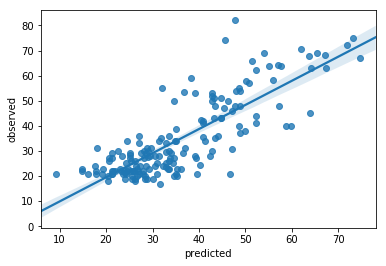

ACCURACY: rho = 0.7621013678928644, mae = 6.781456840708081


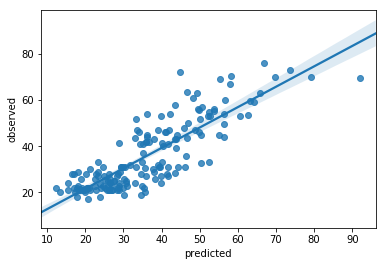

ACCURACY: rho = 0.8231102492146112, mae = 6.407678278761721


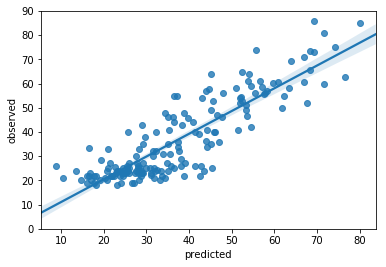

ACCURACY: rho = 0.8314607079658003, mae = 6.463258902433655


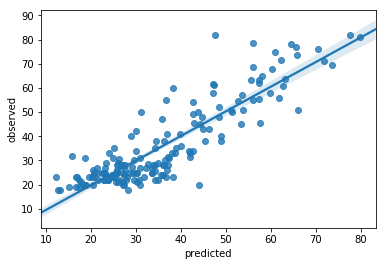

ACCURACY: rho = 0.8125369435108083, mae = 6.101911510553422


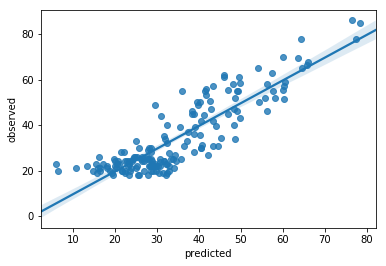

ACCURACY: rho = 0.8123841143236806, mae = 6.2711483347386885


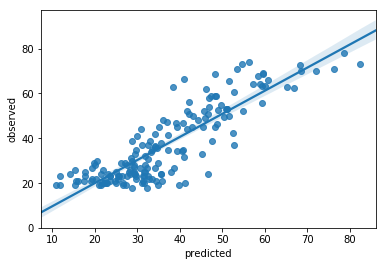

ACCURACY: rho = 0.8141318401334011, mae = 6.747122006194342


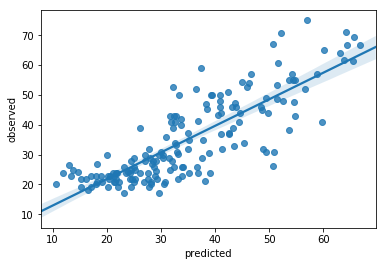

ACCURACY: rho = 0.8191407344859675, mae = 6.172432490030839


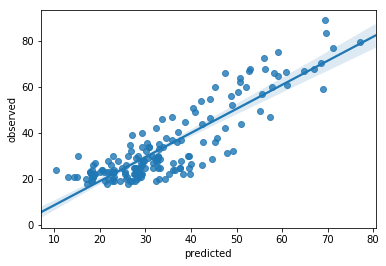

ACCURACY: rho = 0.7790402217071486, mae = 6.420424551131795


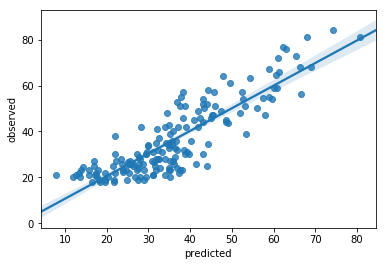

ACCURACY: rho = 0.8340364315487718, mae = 6.211268483014864


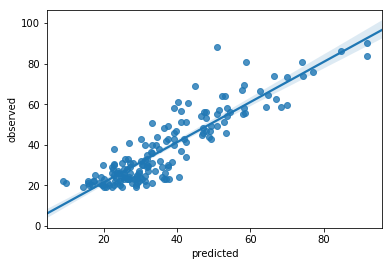

ACCURACY: rho = 0.8495173245008526, mae = 5.971827252403584


In [117]:
param_list = []
r2_list = []
mae_list = []
rho_list = []


for ind_train, ind_test in outer_cv.split(x_,y_):
    x_train, x_test = x_[ind_train], x_[ind_test]
    y_train, y_test = y_[ind_train], y_[ind_test]

#     # normalize to the training set
#     scaler = StandardScaler()
#     x_train = scaler.fit_transform(x_[ind_train])
#     # transform the test set(s) to same parameters as training set
#     x_test = scaler.transform(x_[ind_test])

    # train the model
    clf.fit(X=x_train, y=y_train)
    # save best parameters
    param_list.append(clf.best_params_)

    # test on held-out fold
    y_pred = clf.predict(x_test)
    # evaluate
    r2_list.append(r2_score(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)
    pearson_r2 = stats.pearsonr(y_pred, y_test)[0]**2
    rho = stats.spearmanr(y_pred, y_test)[0]
    rho_list.append(rho)
    
    # plot
    sns.regplot(y_pred, y_test)
    plt.xlabel('predicted')
    plt.ylabel('observed')
    plt.show()
    print('ACCURACY: rho = {}, mae = {}'.format(rho, mae))

In [119]:
np.mean(r2_list)

0.73944057128591612

In [120]:
np.mean(rho_list)

0.81374599352839072

In [121]:
np.mean(mae_list)

6.354852864997099

In [125]:
krr = KernelRidge(alpha=0.001, kernel='rbf').fit(x_,y_)

In [122]:
# set the x
pacxtest = test_feats.loc[:,'scale007_1'::].values
cov = pd.read_csv('/home/users/jvogel/git/PAC2019/PAC2019-MtRoyal_XValidators/COV_feats.csv',
                 index_col=0)
cov = cov.loc[test_ids,cov.columns[1:]].values
xtest = np.concatenate([pacxtest,cov],axis=1)

# set the y
ytest = test_age.loc[:,'age'].values

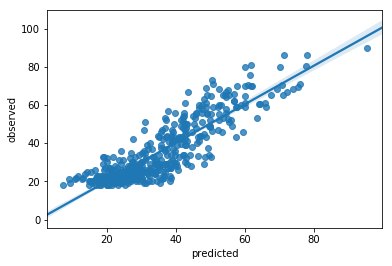

ACCURACY: rho = 0.8450032668836039, mae = 6.312181438660897, r2 = 0.7653548874156563


In [126]:
# test
y_pred = krr.predict(xtest)

# evaluate
r2 = r2_score(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
pearson_r2 = stats.pearsonr(y_pred, ytest)[0]**2
rho = stats.spearmanr(y_pred, ytest)[0]

# plot
sns.regplot(y_pred, ytest)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.show()
print('ACCURACY: rho = {}, mae = {}, r2 = {}'.format(rho, mae, r2))

ACCURACY: rho = 0.8442698276756847, mae = 6.2090507390985, r2 = 0.7675346695583746

### GM Covariance only

In [5]:
cov = pd.read_csv('/home/users/jvogel/git/PAC2019/PAC2019-MtRoyal_XValidators/COV_feats.csv',
                 index_col=0)
covX = cov.loc[train_ids,cov.columns[1:]].values


In [6]:
x_ = covX
y_ = df_age.loc[:,'age'].values

In [9]:
# Set up possible values of parameters to optimize over
p_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
         'kernel': ['rbf']} # I also tried linear and polynomial, but rbf was the best
# We will use kernel ridge regression
krr = KernelRidge()
# set up cross validators
inner_cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
# set the parameter search classifier
clf = GridSearchCV(estimator=krr, param_grid=p_grid, scoring='neg_mean_absolute_error',
                   cv=inner_cv, refit=True)

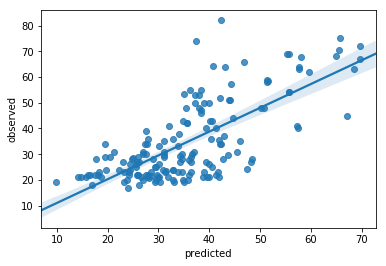

ACCURACY: rho = 0.6542144228873142, mae = 8.579500015775999


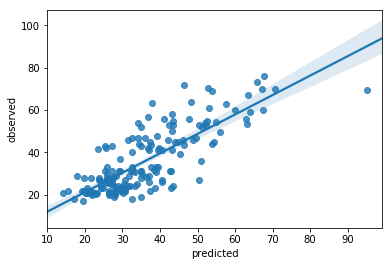

ACCURACY: rho = 0.7622998226587835, mae = 6.757025481628641


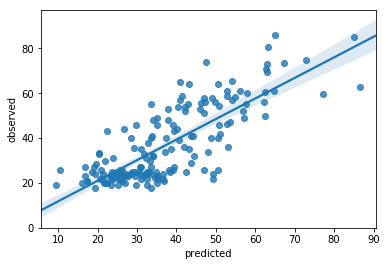

ACCURACY: rho = 0.7423006303127644, mae = 8.329450997019565


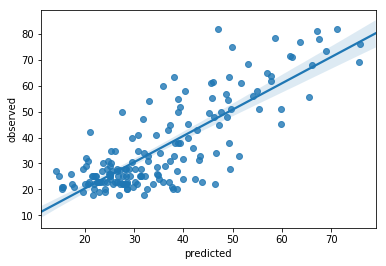

ACCURACY: rho = 0.7006577086673819, mae = 7.513688007631593


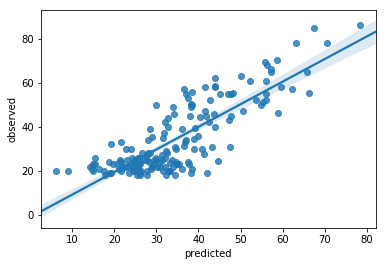

ACCURACY: rho = 0.7264590748457039, mae = 7.3773986433995224


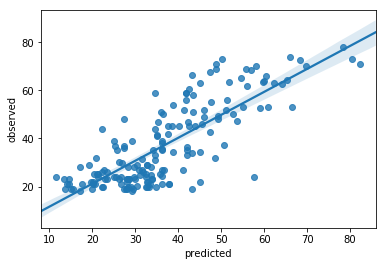

ACCURACY: rho = 0.7488222986125584, mae = 8.021456614206935


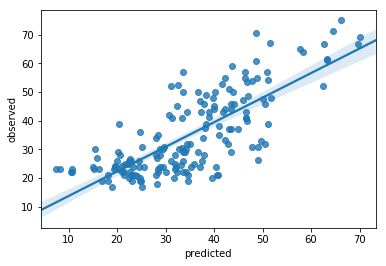

ACCURACY: rho = 0.735374983986994, mae = 7.375751396630844


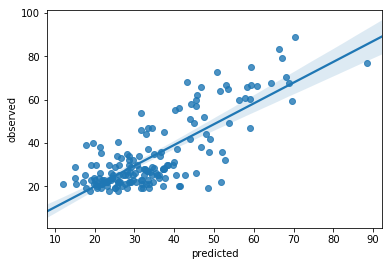

ACCURACY: rho = 0.6266980790104605, mae = 8.062962618651966


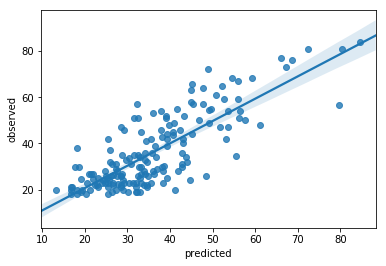

ACCURACY: rho = 0.7402365754964249, mae = 7.456522785973526


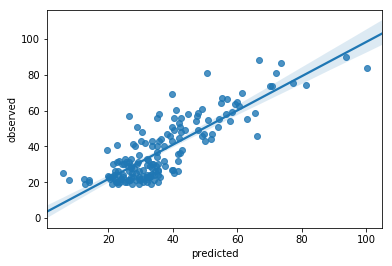

ACCURACY: rho = 0.7534945643320843, mae = 7.7260412110079


In [10]:
param_list = []
r2_list = []
mae_list = []
rho_list = []


for ind_train, ind_test in outer_cv.split(x_,y_):
    x_train, x_test = x_[ind_train], x_[ind_test]
    y_train, y_test = y_[ind_train], y_[ind_test]

#     # normalize to the training set
#     scaler = StandardScaler()
#     x_train = scaler.fit_transform(x_[ind_train])
#     # transform the test set(s) to same parameters as training set
#     x_test = scaler.transform(x_[ind_test])

    # train the model
    clf.fit(X=x_train, y=y_train)
    # save best parameters
    param_list.append(clf.best_params_)

    # test on held-out fold
    y_pred = clf.predict(x_test)
    # evaluate
    r2_list.append(r2_score(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)
    pearson_r2 = stats.pearsonr(y_pred, y_test)[0]**2
    rho = stats.spearmanr(y_pred, y_test)[0]
    rho_list.append(rho)
    
    # plot
    sns.regplot(y_pred, y_test)
    plt.xlabel('predicted')
    plt.ylabel('observed')
    plt.show()
    print('ACCURACY: rho = {}, mae = {}'.format(rho, mae))

In [11]:
param_list

[{'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'}]

In [12]:
krr = KernelRidge(alpha=0.001, kernel='rbf').fit(x_,y_)

In [13]:
# set the x
cov = pd.read_csv('/home/users/jvogel/git/PAC2019/PAC2019-MtRoyal_XValidators/COV_feats.csv',
                 index_col=0)
xtest = cov.loc[test_ids,cov.columns[1:]].values

# set the y
ytest = test_age.loc[:,'age'].values

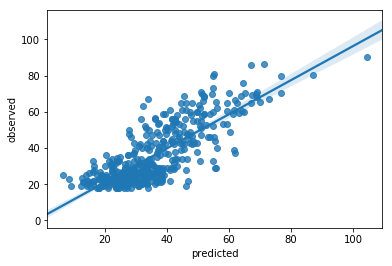

ACCURACY: rho = 0.7488860864465483, mae = 7.884692627607589, r2 = 0.6315595581205815


In [14]:
# test
y_pred = krr.predict(xtest)

# evaluate
r2 = r2_score(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
pearson_r2 = stats.pearsonr(y_pred, ytest)[0]**2
rho = stats.spearmanr(y_pred, ytest)[0]

# plot
sns.regplot(y_pred, ytest)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.show()
print('ACCURACY: rho = {}, mae = {}, r2 = {}'.format(rho, mae, r2))

# Balancing the sample

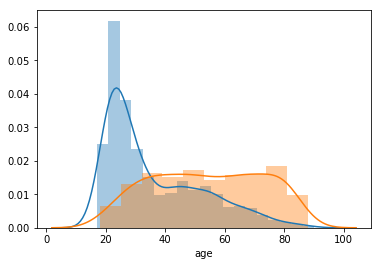

In [21]:
plt.close()
sns.distplot(df_age.age)
sns.distplot(cc_ages)
plt.show()

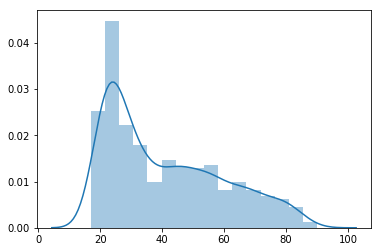

In [23]:
plt.close()
sns.distplot(df_age.age.tolist() + cc_ages.tolist())
plt.show()